In [1]:
# Description: This program uses the Dual Moving Average Crossover to determine when to buy and sell stock

In [32]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
 # Loading Data 
df = pd.read_csv('HistoricalQuotes.csv')

In [34]:
df

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


In [35]:
# Printing out the names of the columns because names have a space before
print(df.columns.tolist())

['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low']


In [38]:
# Converting $ to float
df[df.columns[1:]] = df[df.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

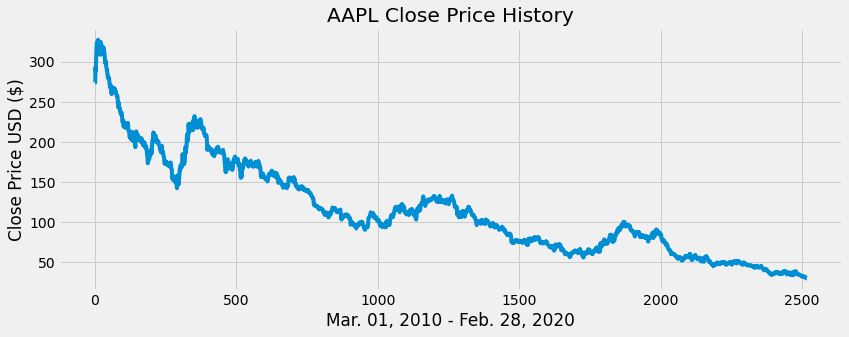

In [39]:
# Plotting the figure
plt.figure(figsize=(12.5, 4.5))
plt.plot(df[' Close/Last'])
plt.title('AAPL Close Price History')
plt.xlabel('Mar. 01, 2010 - Feb. 28, 2020')
plt.ylabel('Close Price USD ($)')
plt.show()

In [40]:
SMA30  =pd.DataFrame()
SMA30[' Close/Last'] = df[' Close/Last'].rolling(window=30).mean()

In [41]:
SMA30

,Close/Last
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2513,33.160150
2514,32.985437
2515,32.796913
2516,32.621483


In [42]:
# Creating a simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100[' Close/Last'] = df[' Close/Last'].rolling(window=100).mean()
SMA100

,Close/Last
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2513,35.609611
2514,35.533368
2515,35.462011
2516,35.389025


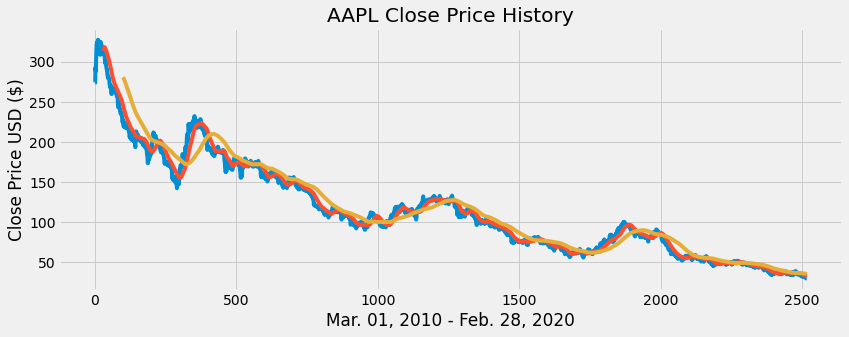

In [43]:
# Visual of data 
plt.figure(figsize=(12.5, 4.5))
plt.plot(df[' Close/Last'], label='AAPL')
plt.plot(SMA30[' Close/Last'], label='SMA30')
plt.plot(SMA100[' Close/Last'], label='SMA100')
plt.title('AAPL Close Price History')
plt.xlabel('Mar. 01, 2010 - Feb. 28, 2020')
plt.ylabel('Close Price USD ($)')
plt.show()

In [44]:
data = pd.DataFrame()
data['AAPL'] = df[' Close/Last']
data['SMA30'] = SMA30[' Close/Last']
data['SMA100'] = SMA100[' Close/Last']
data

,AAPL,SMA30,SMA100
0,273.3600,NaN,NaN
1,273.5200,NaN,NaN
2,292.6500,NaN,NaN
3,288.0800,NaN,NaN
4,298.1800,NaN,NaN
...,...,...,...
2513,31.2786,33.160150,35.609611
2514,30.1014,32.985437,35.533368
2515,29.9043,32.796913,35.462011
2516,29.8357,32.621483,35.389025


In [47]:
# Creating a function to signal when to buy and sell the asset
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['AAPL'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['AAPL'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
        return (sigPriceBuy, sigPriceSell)

In [ ]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [ ]:
data

In [ ]:
plt.fgure(flagsize=(12.6, 4.6))
plt.plot(data['AAPL'], label ='AAPL', alpha=0.35)
plt.plot(data['SMA30'], label ='SMA30', alpha=0.35)
plt.plot(data['SMA100'], label ='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Buy', marker='v', color='red')
plt.title('Apple Close Price History Buy & Sell Signals')
plt.xlabel('Mar. 01, 2010 - Feb. 28, 2020')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()